## <b> Importing libraries:

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as ss
from pandas.plotting import scatter_matrix
import seaborn as sns
import pandas.testing as pdt
import scipy.stats as ss
import numpy.testing as npt
import pandas.testing as pdt
import statsmodels.api as sm
import statsmodels.formula.api as form
from statsmodels.stats import outliers_influence
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
pd.options.mode.chained_assignment = None
sns.set_style("darkgrid")

# <b>Investigating factors determining property value in Mbombela </b>

### Compiled by:
1. Bongumusa Mavuso(1682836)
2. Siyabonga Hlomuka (1384685)
3. Thobelani Makeleni (1199116)

# <b>Executive Summary:</b>

The purpose of this notebook is to present a study that will investigate factors that influence the evaluation of the property value of the properties of the Mbombela Municipality.

The study will model the relationship between each of these different factors and the property value using the dataset from the property evaluation roll which was conducted in 2010 within the area of Mbombela by the Mbombela Municipality.

The main result of this study will be a linear model in this form:
<br>
   \begin{align*}
   y &= \beta_o + \beta_1 * x_1 + \beta_2 * x_2 + ... 
   \end{align*}
<br>
$ where, \ \   x_i  \ \ where \ i\ = \ {{0, 1, ... , n}} \ $  represents the  $ \ x_i \  $  feature which influences the market value (y) of the property and $ \beta_i \  \ where  \  i  \  =  \ {0, 1, 2, .., n } \ $ is the weight of the $ \ x_i \ $  feature. In addition, we will also make use of graphical representations that will show the relationships between the distinct features which have a direct causal influence in determining the market value of the properties and the market value of the properties.

#### <b> Limitations:

We did not get a similar dataset to this one, which was collected before 2010 or after 2010, which we can use to compare this dataset to or use to test our model (test our model on a dataset from a different time period). The dataset was not accompanied by a data description hence we have no rich knowledge about the true meaning of some of the features, how the dataset was collected and how the properties used on the dataset were selected. Furthermore, the dataset is incomplete, since some of the features contained null values for the majority of their values. The data was only collected from Mbombela Mpumalanga, making it difficult for our dataset to represent the entire population of South Africa.

# <b>Introduction:</b>

Every four years, the local municipalities in South Africa conduct a general evaluation roll that determines the municipal values of homes and the property rates that should be paid based on these values and ultimately, the price of the property. The property owners usually have objections to the property values determined by the municipality as these values are usually too low for a property value or too high for the prices that the owners must pay for using the municipality services. The property owners usually do not know how the municipality got to the property prices that come after the evaluation, as with the recent evaluation in where property owners experienced a hike in municipality bills. \[ [Private Property](https://www.privateproperty.co.za/advice/news/articles/property-valuations-shock-what-homeowners-can-do/6230)\]

In this project, we are investigating the factors that contribute to the property evaluation prices using the dataset from Mbombela Municipality Evaluation Roll for 2010. This kind of analysis has not been done before. Useful sites to extend this introduction:
1. [Schindlers](https://www.schindlers.co.za/2017/howdovalrollswork/)

## Question:
 ### What factors determine the property value and to what extent do these factors contribute to the value of the property?
 
\*********
 
## Overview of methology:
A brief overview of the methodology is as follows:<br>
<br>
1) Read in data<br>
<br>
2) Data wrangling:<br>
&emsp;&emsp; Removing variables that are irrelevant to our question<br>
&emsp;&emsp; Removing Variables that are missing most of their values<br>
&emsp;&emsp; Recovering some variables values, null values, that can't be recovered<br>
&emsp;&emsp; Cleaning variables<br>
&emsp;&emsp; Changing Variable types<br>

<br>
3) Encode variables:<br>
&emsp;&emsp;        Encoding categorical variables
<br>
<br>
4) Exploratory Analyses:<br>
&emsp;&emsp;        Put Exploratory graphs<br>
&emsp;&emsp;        Calculate statistic figures:<br>
&emsp;&emsp;&emsp;&emsp;                eg. Mean, std, min, max and percentiles



# <b> Data Description: </b>

The dataset was obtained from [Open Africa:  Mbombela Municipality Property Valuation 2010 ](https://africaopendata.org/dataset/mbombela-municipality-property-valuation-2010) and downloaded on  18 April 2021. The dataset contains over 57000 data points which have 49 features that describe some of the properties in Mbombela Municipality. 

#### Date collected:
The data was collected in Mbombela Municipal Council, in Mpumalanga, South Africa, in 2010. The last time the data modified was on December 21, 2017, at 1:09 PM (UTC+02:00)
 
#### Dataset before cleaning:
The original dataset consists of 49 columns, 48 showing different factors contributing to the price of a property in Mbombela. The description of these columns is given below:

- Township = The township in Mbombeni.
- Stand No = Stand number is used to identify the property
- Sect Title No = Section Title Number. Sectional Title, as a form of ownership (as per the Sectional Titles Act No.95 of 1986), emerged originally to permit parties to buy a piece or section of a larger property/building/development in a fashion where there ownership (or title) is protected (under Sectional Title law) and where there are clear rules and guidelines on how the overall property is managed, maintained and run. 
- StandDescrip = Stand Description.
- Owner Name = The owner of the property.
- Account No = Account Number. Account Number of the owner.
- Prop Category = Property Category
- TariffCode = Tariff Code.
- Physical Addr = Physical Address Showing the physical location of the property.
- Street No = Street Number. Identifying the street where the property is located
- Size = The size of the property measured in square meters
- Up-Level Size
- MarketValue = The price which the property is valued at. (Our Predictive Variable)
- Exemp Size
- Exemp Value
- Main Roll No = Main Roll Number. A Roll Number tells you everything you need to know about where a property is located. 
- Supp RollNo = Supplimentary roll number. Every property in every municipality should (hypothetically) be on a roll, but because properties are continuously coming into existence and ceasing to exist, new rolls are created (these are referred to as supplementary rolls) to include any properties that have not been previously recorded on another, prior, general roll.
- Owner Type = What type of owner is it (Private, municiplaity, Departmental and General)
- Valuation Date = When was the property evaluated  to put a market value on it.
- Effect Date = The Effective Date for each Property Use Detail is the date that it was first valid for the property.
- Up-LevelInd
- Zone Code = Land zoning is how local governments, such as city councils, restrict the physical development and use of specific parcels of land. 
- Zone Descrip = Zone Description, Expanding on the codes and what it means. The Code descriptions are: 'BUSINESS 2', 'BUSINESS 1', 'PUBLIC GARAGE', 'RESIDENTIAL 4','SPECIAL', 'GOVERNMENT', 'MUNICIPAL', 'EXISTING PUBLIC ROADS', 'RESIDENTIAL 1', 'PUBLIC OPEN SPACE', 'BUSINESS 4', 'RESIDENTIAL 3', 'EDUCATIONAL', 'RESIDENTIAL 2', 'PRIVATE OPEN SPACE', 'INSTITUTIONAL', 'INDUSTRIAL 1', 'CHURCHES', 'INDUSTRIAL 3', 'INDUSTRIAL 2', 'TRANSNET', 'AGRICULTURE', 'BUSINESS 3', 'PARKING', 'CEMETRY', 'RECREATION', 'RAILWAY LINE(TRANSNET)', 'PRIVATE ROAD', 'RESIDENTIAL 5', 'GOVERNMENT & TELKOM', 'COMMERCIAL', 'KANYAMAZANE'
- Usage Code = Usage code is a code that details how the property will be used.
- UsageDescrip = Usage Description, Expanding on the codes and what it means. The Code descriptions are: 'BUSINESS 2', 'BUSINESS 1', 'PUBLIC GARAGE', 'RESIDENTIAL 4', 'SPECIAL', 'GOVERNMENT', 'MUNICIPAL', 'EXISTING PUBLIC ROADS', 'RESIDENTIAL 1', 'PUBLIC OPEN SPACE', 'BUSINESS 4', 'RESIDENTIAL 3', 'EDUCATIONAL', 'RESIDENTIAL BUSINESS', 'RESIDENTIAL 2', 'PRIVATE OPEN SPACE', 'DWELLINGS', 'INSTITUTIONAL', 'INDUSTRIAL 1', 'VACANT LAND SR', 'CHURCHES', 'INDUSTRIAL 3', 'PARKING', 'BED & BREAKFAST', 'INDUSTRIAL 2', 'TRANSNET', 'AGRICULTURE', 'BUSINESS 3', 'CEMETRY', 'RESIDENTIAL GUEST HOUSE', 'RESERVOIR', 'BUSINESS PREMISES', 'ROAD', 'RAILWAY LINE(TRANSNET)', 'AGRICULTURAL', 'PROPOSED NEW ROAD', 'RESIDENTIAL 5', 'VACANT LAND SINGLE RESIDENTIAL', 'POST OFFICE', 'COUNCIL VACANT RES 1 STANDS', 'FARM', 'SHOP', 'GOVERNMENT AND TELKOM', 'FACTORY', 'OFFICE', 'KANYAMASANE', 'SUBSTATION', 'CHURCH', 'VACANT LAND PLACES OF WORSHIP', 'CHRECHE', 'SCHOOL', 'PETROL FILLING STATION', 'CHICKEN HATCHERY', 'COMMUNITY CENTRE', 'ST DWELLING', 'ST RESIDENTIAL'
- Empty Stand Ind = Empty stand index that determines in the stand is empty or not.
- Valuation Type = The type of valuation method they used to value the property.
- SGNumber
- Ward
- Cycle
- Meter Book
- Status = Property status refers to the situation of a property that was for sale or is currently for sale.
- Val Cnt = This value keep record of the number of evaluation that have been performed on the property.
- Postal Addr1 = This is the first line of the address.
- Postal Addr2 = This is the second line of the address.
- Postal Addr3 = This is the third line of the address.
- Postal Addr4 = This is the fourth line of the address.
- Postal Addr5 = This is the fifth  line of the address.
- Postal Code = This 
- BC Create Date
- BC Orig Date
- BC Altern Date
- BC Value
- BC Tariff
- Deed Date = This is the date on which the deep of a property was first obtained.
- Deed No = Deed Number.
- Register Date = Date which the property was registered.
- Register No = Property Registration Number. means the number issued by the City identifying the Application.
- Capture Date = This is the last date the evaluation findings of a proprerty were recorded.



#### Aspects of Data Quality:
- The data was retrieved from openAFRICA , openAFRICA is not a government portal. Instead, it’s a grassroots initiative, maintained by Code for Africa, as a public service.OpenAFRICA has additional support from Amazon Web Services (AWS) and the World Bank, both well known and accredited organisation thus making our source openAFRICA an accredible source.

- The data collection was done in 2010 and the evaluations of Market Value where done around the same time interval 2008 to 2010 making our Market values comparison fair because the amounts where not effected by other time factors like inflation. 

- The data was collected from the same region(Mbombeni)

- In terms of completness of data, we have some missing values from some cloumns, most notably columns BC Tariff, BC Value and SGNumber having no values at all. Columns Sect Title No, Empty Stand Ind, Postal Addr3, Postal Addr4, Postal Addr5, Deed No and StandDescrip have alot of missing values as well. The rest of the columns are mostly filled with a minimal of missing values.

- The columns are consistent in terms of the data type of each column.
- In terms of Unifromaty most of the columns have a consistent use of units and scales except for the column'Owner Type' as this has some numeric values which are unexplained.

#### Ability to answer question:
Considering our Question 'What factors determine the property value and to what extent do these factors contribute to the value of the property?' our dataset has adequate variables like the size of property, owners of property etc, to tackle this question. At high sight, after close data analyse, it is clear to see that our variables might not be the best individually to tackle our question as no variable individually has a strong relationship with our predictive variable (Market value).

# Reading in data:

In [2]:
# reading in the dataset
data = pd.read_excel('valuation-2010.xls')

### Validations:

In [3]:
# getting information about the attributes of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57252 entries, 0 to 57251
Data columns (total 49 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [6]:
# getting description of the dataset
data.describe()

,Account No,Size,Up-Level Size,MarketValue,Exemp Size,Exemp Value,Main Roll No,Supp RollNo,Valuation Date,Effect Date,...,Val Cnt,Postal Code,BC Create Date,BC Orig Date,BC Altern Date,BC Value,BC Tariff,Deed Date,Register Date,Capture Date
count,5.723900e+04,5.724600e+04,57246.0,5.724600e+04,57246.0,57246.0,57246.0,57246.000000,5.724600e+04,5.724600e+04,...,57246.000000,57227.000000,57227.0,57227.0,57227.0,0.0,0.0,5.722700e+04,5.722700e+04,5.722700e+04
mean,2.632920e+06,4.980989e+04,0.0,6.644221e+05,0.0,0.0,2.0,1.442913,2.009117e+07,2.009117e+07,...,1.000943,1900.546980,0.0,0.0,0.0,NaN,NaN,2.202494e+06,9.767406e+06,2.877971e+07
std,9.302737e+05,8.205704e+05,0.0,3.786126e+06,0.0,0.0,0.0,1.055363,2.034716e+03,2.034717e+03,...,0.040940,2221.613457,0.0,0.0,0.0,NaN,NaN,6.263835e+06,1.001051e+07,4.032805e+07
min,1.000855e+06,0.000000e+00,0.0,0.000000e+00,0.0,0.0,2.0,1.000000,2.009070e+07,2.009070e+07,...,1.000000,0.000000,0.0,0.0,0.0,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.114612e+06,3.520000e+02,0.0,5.600000e+04,0.0,0.0,2.0,1.000000,2.009070e+07,2.009070e+07,...,1.000000,1200.000000,0.0,0.0,0.0,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.506226e+06,5.420000e+02,0.0,2.400000e+05,0.0,0.0,2.0,1.000000,2.009070e+07,2.009070e+07,...,1.000000,1200.000000,0.0,0.0,0.0,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.062104e+06,1.108000e+03,0.0,7.000000e+05,0.0,0.0,2.0,1.000000,2.009070e+07,2.009070e+07,...,1.000000,1240.000000,0.0,0.0,0.0,NaN,NaN,0.000000e+00,2.004071e+07,2.009092e+07
max,1.564422e+07,9.327444e+07,0.0,6.600000e+08,0.0,0.0,2.0,6.000000,2.010012e+07,2.010012e+07,...,4.000000,9999.000000,0.0,0.0,0.0,NaN,NaN,2.009082e+07,2.202093e+07,1.000000e+08


In [7]:
# displaying the first five points in our dataset
data.head()

,Township,Stand No,Sect Title No,StandDescrip,Owner Name,Account No,Prop Category,TariffCode,Physical Addr,Street No,...,BC Create Date,BC Orig Date,BC Altern Date,BC Value,BC Tariff,Deed Date,Deed No,Register Date,Register No,Capture Date
0,NELSPRUIT TOWN,000000000000010000100000000,NaN,GED 1 ERF 1,NELSPRUIT HARDWARE,2218141.0,BUS,VABUS,PAUL KRUGER STREET,1,...,0.0,0.0,0.0,NaN,NaN,0.0,NaN,19810925.0,T46343/81,99999999.0
1,NELSPRUIT TOWN,00000000000001000RE00000000,NaN,RESTANT VAN ERF 1,MINTY IE & SONS PTY LTD,2218119.0,BUS,VABUS,ANDERSON STREET,36,...,0.0,0.0,0.0,NaN,NaN,0.0,NaN,19810925.0,T46344/81,99999999.0
2,NELSPRUIT TOWN,000000000000020000000000000,NaN,ERF 2,MINTYS UNIVERSAL STORES LTD,2218130.0,BUS,VABUS,ANDREW STREET,33,...,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,T96299/200,0.0
3,NELSPRUIT TOWN,000000000000030000000000000,NaN,ERF 3,LOWMIN PROPERTIES (PTY) LTD,2217568.0,BUS,VABUS,ANDERSON STREET,32,...,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,T96299/200,0.0
4,NELSPRUIT TOWN,000000000000040000000000000,NaN,ERF 4,NELMIN ERF 4 PROPERTIES (PTY) LTD,2040436.0,BUS,VABUS,ANDERSON STREET,30,...,0.0,0.0,0.0,NaN,NaN,0.0,NaN,20020814.0,T96299/200,20021029.0


From the above summary, it is clear that each column is a variable and each row represents a new property record that has values from each column. The raw data has some missing values indicated by NaN. Each Column is either an object or float, the float is all the numeric columns, including the date, and the rest are treated as an object. The date will late be changed to the correct type(DateTime). 

It is clear that this dataset need processing. In the next section we process the dataset. We will remove attributes that we think intuitively they can not influence the market value. We will provide other reasons for removing some of the attributes.  We will also encode some of the attributes values and lastly, we will account for NaN values or unknown values.

# Data Wrangling:

<blockqoute>
In this next cell, we drop several columns of the dataset either because we think they were irrelevant in determining the value of the property, the data had a lot of missing values or the information contained in the column was redundant as it was contained in another column.
</blockqoute>

In [8]:
#Columns to be removed
#Stand No, Sect Tittle, Account Number, TariffCode, Street No, Up-Level Size,
#Exemp Size, Main Roll No, Owner Type, Valuation Date, Up-levelInd, Usage Description
#Zone Description, SG Number, Status, Postal Address(1,2, 3, 4, 5), All columns with 'BC', Postal Code,
#Deed No, Register No, Valuation Date, Capture Date 
# Stand No, Sect Tittle, Account Number, TarrifCode(Because it is dependent ), Street No,Up-Level Size,  Exemp Size,Exemp Value,  
#Main Roll No, Owner Type(dependent on), Valuation date, Up-LevelInd, usage description, Zone Description, SGNumber, 
# Status, (Postal Adrress1, 2, 3, 4, 5), BC Date, Postal Code, Deed No,(All BC Values), Register No.
#Valuation Date(date time type), Capture Date
# Usage Code: Discard later if needed
# What does Empty Stand Ind - indicate?(remove if possible)
# Investigate the meaning of Valuation Type Values
#More info on: Meter Book
# Verify if Postal Code matches with the township
# 
data_new = data.drop(columns = ['Stand No', 'StandDescrip','Sect Title No', 'Account No', 'TariffCode',
       'Street No', 'Up-Level Size','Exemp Size',
       'Exemp Value', 'Main Roll No', 'Owner Type',
       'Valuation Date', 'Up-LevelInd','BC Create Date',
       'BC Orig Date', 'BC Altern Date', 'BC Value','BC Tariff',
       'Zone Descrip', 'UsageDescrip','SGNumber','Status',
       'Postal Addr1', 'Postal Addr2', 'Postal Addr3',
       'Postal Addr4', 'Postal Addr5', 'Postal Code',
       'Deed Date', 'Deed No', 'Register Date', 'Register No'])
data_new = data_new.drop(columns = [data_new.columns[-1]])
##Number of columns in the oriiginal data set
num_cols_orig = len(data.columns)
new_num_cols = len(data_new.columns)
left_cols= num_cols_orig - new_num_cols
#Capute date is not properly named, so we must remove it using the indexs
print('After cleaning our data, we were able to remove', str(left_cols) + " features", 'and we were left with', str(new_num_cols) + " features")
# print('\nWe then set our MarketValue as our independed variable, the one we want to predict and moved it to the last columns for easy accessing')
# temp_col = data_new['MarketValue']
# data_new = data_new.drop(columns = ['MarketValue'])
# data_new['MarketValue'] = temp_col
print('\n''This is our dataset after perfoming the above operations:')
data_new.head(3)

After cleaning our data, we were able to remove 33 features and we were left with 16 features

This is our dataset after perfoming the above operations:


,Township,Owner Name,Prop Category,Physical Addr,Size,MarketValue,Supp RollNo,Effect Date,Zone Code,Usage Code,Empty Stand Ind,Valuation Type,Ward,Cycle,Meter Book,Val Cnt
0,NELSPRUIT TOWN,NELSPRUIT HARDWARE,BUS,PAUL KRUGER STREET,862.0,2900000.0,4.0,20090805.0,BUS2,BUS2,N,VI,14.0,3.0,MB0201,1.0
1,NELSPRUIT TOWN,MINTY IE & SONS PTY LTD,BUS,ANDERSON STREET,625.0,1700000.0,1.0,20090701.0,BUS2,BUS2,NaN,VG,14.0,3.0,MB0005,1.0
2,NELSPRUIT TOWN,MINTYS UNIVERSAL STORES LTD,BUS,ANDREW STREET,1487.0,6200000.0,4.0,20090805.0,BUS2,BUS2,NaN,VI,14.0,3.0,MB0201,1.0


Now that we have removed all the dirty columns by dropping them, we continued to clean the dataset that was left by cleaning the Nan values by either trying to recover lost data using the currently existing data or removing the Nan data if it was unrecoverable.

## Wrangling from column 0 to column 5:

We clean the remaining dataset in portion to avoid errors and make it easy to manage and trace mistakes in the data. Beginning with columns from 1 to column 5.

In [9]:
df = pd.DataFrame()
df = data_new.copy()
df.head()

,Township,Owner Name,Prop Category,Physical Addr,Size,MarketValue,Supp RollNo,Effect Date,Zone Code,Usage Code,Empty Stand Ind,Valuation Type,Ward,Cycle,Meter Book,Val Cnt
0,NELSPRUIT TOWN,NELSPRUIT HARDWARE,BUS,PAUL KRUGER STREET,862.0,2900000.0,4.0,20090805.0,BUS2,BUS2,N,VI,14.0,3.0,MB0201,1.0
1,NELSPRUIT TOWN,MINTY IE & SONS PTY LTD,BUS,ANDERSON STREET,625.0,1700000.0,1.0,20090701.0,BUS2,BUS2,NaN,VG,14.0,3.0,MB0005,1.0
2,NELSPRUIT TOWN,MINTYS UNIVERSAL STORES LTD,BUS,ANDREW STREET,1487.0,6200000.0,4.0,20090805.0,BUS2,BUS2,NaN,VI,14.0,3.0,MB0201,1.0
3,NELSPRUIT TOWN,LOWMIN PROPERTIES (PTY) LTD,BUS,ANDERSON STREET,1487.0,7300000.0,4.0,20090805.0,BUS2,BUS2,NaN,VI,14.0,3.0,MB0005,1.0
4,NELSPRUIT TOWN,NELMIN ERF 4 PROPERTIES (PTY) LTD,BUS,ANDERSON STREET,1487.0,4500000.0,6.0,20100125.0,BUS2,BUS2,N,VI,14.0,3.0,MB0005,1.0


In [10]:
print('Showing the null values found in the above dataframe for each columns:\n')
print('Township contains ', df['Township'].isnull().sum(), 'null values')          #printing null values of Township
print('Owner Name column contains', df['Owner Name'].isnull().sum(), 'null values')#printing null values of Owner Name
print('Prop Category contains', df['Prop Category'].isnull().sum(), 'null values') #printing null values of Prop Category
print('Physical Addr contains', df['Physical Addr'].isnull().sum(), 'null values') #printing null values of Physical Addr
print('Size column contains', df['Size'].isnull().sum(), 'null values')            #printing null values of Size
print('MarketValue contains', df['MarketValue'].isnull().sum(), 'null values')     #printing null values of MarketValue

Showing the null values found in the above dataframe for each columns:

Township contains  0 null values
Owner Name column contains 13 null values
Prop Category contains 6 null values
Physical Addr contains 285 null values
Size column contains 6 null values
MarketValue contains 6 null values


We will start with the columns that contain the least number of null/Nan. 

We start by the Prop Category column, and encode the different attributes using numbers, we encoded the Nan in the Owners column with "Other" to represent the owners we do not have details of.

We filled the Nan values in the columns 'Owner Name' and 'Physical Addr' with the word 'Other' and 'Unknown' respectively as they were no method to recover them.

In [11]:
#encode prop category
#1 BUS and #2 RES #3 GOV #4 MUN #5 POW #6 OTH #7 PSI #8 AG #9 RUR
df['Prop Category'] = np.where(df['Prop Category'] == 'BUS', 1 ,df['Prop Category'])
df['Prop Category'] = np.where(df['Prop Category'] == 'RES', 2 ,df['Prop Category'])
df['Prop Category'] = np.where(df['Prop Category'] == 'GOV', 3 ,df['Prop Category'])
df['Prop Category'] = np.where(df['Prop Category'] == 'MUN', 4 ,df['Prop Category'])
df['Prop Category'] = np.where(df['Prop Category'] == 'POW', 5 ,df['Prop Category'])
df['Prop Category'] = np.where(df['Prop Category'] == 'OTH', 6 ,df['Prop Category'])
df['Prop Category'] = np.where(df['Prop Category'] == 'PSI', 7 ,df['Prop Category'])
df['Prop Category'] = np.where(df['Prop Category'] == 'AG',  8 ,df['Prop Category'])
df['Prop Category'] = np.where(df['Prop Category'] == 'RUR', 9 ,df['Prop Category'])

In [12]:
#encode missing owners name with 'other'
df['Owner Name'] = df['Owner Name'].fillna('Other')
#df['Owner Name'].isnull().sum()

In [13]:
#encode missing values for physical address
df['Physical Addr'] = df['Physical Addr'].fillna('Unknown')
#df['Physical Addr'].isnull().sum()

In [14]:
physical_addr = df['Physical Addr'].tolist()
streets  = []
street_num  = 1
for i, street in enumerate(physical_addr):
    if street not in streets:
        streets.append(street)
        physical_addr[i] = streets.index(street) + 1
    else:
        physical_addr[i] = streets.index(street) + 1
df['Physical Addr'] = physical_addr

In [15]:
#df['Prop Category']

In [16]:
print('This is the dataframe after cleaning the columns 0-5:')
##Store this new cleaned to df_clean
df_clean = df.copy()
df.head()

This is the dataframe after cleaning the columns 0-5:


,Township,Owner Name,Prop Category,Physical Addr,Size,MarketValue,Supp RollNo,Effect Date,Zone Code,Usage Code,Empty Stand Ind,Valuation Type,Ward,Cycle,Meter Book,Val Cnt
0,NELSPRUIT TOWN,NELSPRUIT HARDWARE,1,1,862.0,2900000.0,4.0,20090805.0,BUS2,BUS2,N,VI,14.0,3.0,MB0201,1.0
1,NELSPRUIT TOWN,MINTY IE & SONS PTY LTD,1,2,625.0,1700000.0,1.0,20090701.0,BUS2,BUS2,NaN,VG,14.0,3.0,MB0005,1.0
2,NELSPRUIT TOWN,MINTYS UNIVERSAL STORES LTD,1,3,1487.0,6200000.0,4.0,20090805.0,BUS2,BUS2,NaN,VI,14.0,3.0,MB0201,1.0
3,NELSPRUIT TOWN,LOWMIN PROPERTIES (PTY) LTD,1,2,1487.0,7300000.0,4.0,20090805.0,BUS2,BUS2,NaN,VI,14.0,3.0,MB0005,1.0
4,NELSPRUIT TOWN,NELMIN ERF 4 PROPERTIES (PTY) LTD,1,2,1487.0,4500000.0,6.0,20100125.0,BUS2,BUS2,N,VI,14.0,3.0,MB0005,1.0


## Data Wrangling on column 6-12:

In [17]:
#Data wrangling of dataset from Column 7 to Coulumn 13
data_section = df_clean.iloc[:,6:12]
data_section

,Supp RollNo,Effect Date,Zone Code,Usage Code,Empty Stand Ind,Valuation Type
0,4.0,20090805.0,BUS2,BUS2,N,VI
1,1.0,20090701.0,BUS2,BUS2,NaN,VG
2,4.0,20090805.0,BUS2,BUS2,NaN,VI
3,4.0,20090805.0,BUS2,BUS2,NaN,VI
4,6.0,20100125.0,BUS2,BUS2,N,VI
...,...,...,...,...,...,...
57247,1.0,20090701.0,RES2,RES2,N,VG
57248,1.0,20090701.0,RES2,RES2,N,VG
57249,1.0,20090701.0,RES2,RES2,N,VG
57250,2.0,20090702.0,RES1,RES1,N,VI


Noting that there is only N and Nan values in the 'Empty Stand Ind' column, we could have decided that the Nan represented YES but that assumption was far fetched as we cannot conclude that the stand is empty or not give as there may be other factors affecting this variable, as a result, we dropped this column and have the result shown below.


In [18]:
#There is only N and null values in 'Empty Stand Ind'. The question is 'is null equal to yes?', this assumption is far fetched thus might be incorrect, based on that we take out this column

##For debugging purposes
try:
    df_clean = df_clean.drop(columns = 'Empty Stand Ind')
except:
    print('The column Epmty Stand Ind has been removed already')
data_section = df_clean.iloc[:,6:12]
data_section

,Supp RollNo,Effect Date,Zone Code,Usage Code,Valuation Type,Ward
0,4.0,20090805.0,BUS2,BUS2,VI,14.0
1,1.0,20090701.0,BUS2,BUS2,VG,14.0
2,4.0,20090805.0,BUS2,BUS2,VI,14.0
3,4.0,20090805.0,BUS2,BUS2,VI,14.0
4,6.0,20100125.0,BUS2,BUS2,VI,14.0
...,...,...,...,...,...,...
57247,1.0,20090701.0,RES2,RES2,VG,30.0
57248,1.0,20090701.0,RES2,RES2,VG,30.0
57249,1.0,20090701.0,RES2,RES2,VG,30.0
57250,2.0,20090702.0,RES1,RES1,VI,30.0


In [19]:
print('This is the number of columns with missing values:', end = " ")
#Checking columns with null values
ncols_missing = data_section.isnull().any(axis=0).sum()
print(ncols_missing)
print('This is the number of rows with missing values:', end = " ")
#Checking rows with null values
nrows_missing = data_section.isnull().any(axis=1).sum()
print(nrows_missing)

This is the number of columns with missing values: 6
This is the number of rows with missing values: 6


In [20]:
#All 6 columns have missing values
#6 rows have missing values

#For seing which rows index are null in respect to each column.
print(np.where(data_section['Supp RollNo'].isnull() == True)[0])
print("rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Supp RollNo")
print(np.where(data_section['Effect Date'].isnull() == True)[0])
print("rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Effect Date")
print(np.where(data_section['Zone Code'].isnull() == True)[0])
print("rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Zone Code")
print(np.where(data_section['Usage Code'].isnull() == True)[0])
print("rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Usage Code")
print(np.where(data_section['Valuation Type'].isnull() == True)[0])
print("rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Valuation Type")
print(np.where(data_section['Ward'].isnull() == True)[0])
print("rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Ward")

[30400 40754 40767 40800 40815 40834]
rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Supp RollNo
[30400 40754 40767 40800 40815 40834]
rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Effect Date
[30400 40754 40767 40800 40815 40834]
rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Zone Code
[30400 40754 40767 40800 40815 40834]
rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Usage Code
[30400 40754 40767 40800 40815 40834]
rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Valuation Type
[30400 40754 40767 40800 40815 40834]
rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Ward


In [21]:
print(df_clean.loc[[30400, 40754, 40767, 40800, 40815, 40834]])
#All the rows with missing values are removed
df_clean = df_clean.drop([30400, 40754, 40767, 40800, 40815, 40834]);

            Township                   Owner Name Prop Category  \
30400    ROCKY DRIFT   TEN ROCKY DRIFT PTY LTD              NaN   
40754  KANYAMAZANE-A      SM NGOMANE                        NaN   
40767  KANYAMAZANE-A      HM NGOMANE                        NaN   
40800  KANYAMAZANE-A       F NGWAMBA                        NaN   
40815  KANYAMAZANE-A  M & NR THELA/NKOSI                    NaN   
40834  KANYAMAZANE-A      MS NHLAPO                         NaN   

       Physical Addr  Size  MarketValue  Supp RollNo  Effect Date Zone Code  \
30400            557   NaN          NaN          NaN          NaN       NaN   
40754            557   NaN          NaN          NaN          NaN       NaN   
40767            557   NaN          NaN          NaN          NaN       NaN   
40800            557   NaN          NaN          NaN          NaN       NaN   
40815            557   NaN          NaN          NaN          NaN       NaN   
40834            557   NaN          NaN          NaN    

In [22]:
print('This is the number of columns with missing values:', end = " ")
data_section = df_clean.iloc[:,7:12]
#Checking columns with null values
ncols_missing = data_section.isnull().any(axis=0).sum()
print(ncols_missing)
print('This is the number of rows with the missing values:', end = " ")
#Checking rows with null values
nrows_missing = data_section.isnull().any(axis=1).sum()
print(nrows_missing)

This is the number of columns with missing values: 0
This is the number of rows with the missing values: 0


In [23]:
#Making my dictionaries
dic = pd.Series(data_section['Zone Code'].unique())
dic.index = dic.index + 1
dic = pd.Series(dic.index.values, index = dic)

dic2 = pd.Series(data_section['Usage Code'].unique())
dic2.index = dic2.index + 1
dic2 = pd.Series(dic2.index.values, index = dic2)

dic3 = pd.Series(data_section['Valuation Type'].unique())
dic3.index = dic3.index + 1
dic3 = pd.Series(dic3.index.values, index = dic3)

In [24]:
#Encoding based on the dictionaries
lookup_table = dict(dic)

def lookup_customer(val):
    return lookup_table.get(val, np.nan)


data_section['Zone Code'] = data_section['Zone Code'].apply(lambda x: lookup_customer(x));

lookup_table = dict(dic2)
data_section['Usage Code'] = data_section['Usage Code'].apply(lambda x: lookup_customer(x));

lookup_table = dict(dic3)
data_section['Valuation Type'] = data_section['Valuation Type'].apply(lambda x: lookup_customer(x));

data_section
#df_new.head(20)

,Effect Date,Zone Code,Usage Code,Valuation Type,Ward
0,20090805.0,1,1,1,14.0
1,20090701.0,1,1,2,14.0
2,20090805.0,1,1,1,14.0
3,20090805.0,1,1,1,14.0
4,20100125.0,1,1,1,14.0
...,...,...,...,...,...
57247,20090701.0,14,15,2,30.0
57248,20090701.0,14,15,2,30.0
57249,20090701.0,14,15,2,30.0
57250,20090702.0,9,9,1,30.0


In [25]:
###Supp RollNo is Supplimentary roll number
##Every property in every municipality should (hypothetically) be on a roll, but because properties are continuously coming into existence and ceasing to exist, new rolls are created (these are referred to as supplementary rolls) to include any properties that have not been previously recorded on another, prior, general roll.
data_section.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57246 entries, 0 to 57251
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Effect Date     57246 non-null  float64
 1   Zone Code       57246 non-null  int64  
 2   Usage Code      57246 non-null  int64  
 3   Valuation Type  57246 non-null  int64  
 4   Ward            57246 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 2.6 MB


In [26]:
#convert column Effect date to date time
data_section['Effect Date'] = pd.to_datetime(data_section['Effect Date'], format='%Y%m%d') 
data_section

,Effect Date,Zone Code,Usage Code,Valuation Type,Ward
0,2009-08-05,1,1,1,14.0
1,2009-07-01,1,1,2,14.0
2,2009-08-05,1,1,1,14.0
3,2009-08-05,1,1,1,14.0
4,2010-01-25,1,1,1,14.0
...,...,...,...,...,...
57247,2009-07-01,14,15,2,30.0
57248,2009-07-01,14,15,2,30.0
57249,2009-07-01,14,15,2,30.0
57250,2009-07-02,9,9,1,30.0


In [27]:
print('The final cleaned dataframe')
df_clean.iloc[:,7:12] = data_section
df_clean

The final cleaned dataframe


,Township,Owner Name,Prop Category,Physical Addr,Size,MarketValue,Supp RollNo,Effect Date,Zone Code,Usage Code,Valuation Type,Ward,Cycle,Meter Book,Val Cnt
0,NELSPRUIT TOWN,NELSPRUIT HARDWARE,1,1,862.0,2900000.0,4.0,2009-08-05,1,1,1,14.0,3.0,MB0201,1.0
1,NELSPRUIT TOWN,MINTY IE & SONS PTY LTD,1,2,625.0,1700000.0,1.0,2009-07-01,1,1,2,14.0,3.0,MB0005,1.0
2,NELSPRUIT TOWN,MINTYS UNIVERSAL STORES LTD,1,3,1487.0,6200000.0,4.0,2009-08-05,1,1,1,14.0,3.0,MB0201,1.0
3,NELSPRUIT TOWN,LOWMIN PROPERTIES (PTY) LTD,1,2,1487.0,7300000.0,4.0,2009-08-05,1,1,1,14.0,3.0,MB0005,1.0
4,NELSPRUIT TOWN,NELMIN ERF 4 PROPERTIES (PTY) LTD,1,2,1487.0,4500000.0,6.0,2010-01-25,1,1,1,14.0,3.0,MB0005,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57247,WHITERIVER ACRES,INGWE TRUST,2,740,91.0,475000.0,1.0,2009-07-01,14,15,2,30.0,40.0,MB4207,1.0
57248,WHITERIVER ACRES,S EIGENHUIS,2,740,91.0,475000.0,1.0,2009-07-01,14,15,2,30.0,40.0,MB4207,1.0
57249,WHITERIVER ACRES,JS STANDER,2,740,91.0,475000.0,1.0,2009-07-01,14,15,2,30.0,40.0,MB4207,1.0
57250,WILLIAM LYNNSTRAAT 51,JS STANDER,2,738,105.0,459000.0,2.0,2009-07-02,9,9,1,30.0,40.0,MB4221,1.0


In [28]:
##Cleaning the meter book column
#Getting the unique element

#Removing the rows where meter book is Nan
df_clean = df_clean[df_clean['Meter Book'].notna()]

meter_list = list(set(df_clean['Meter Book']))

In [29]:
meter_dic = {}
for i in meter_list:
    if type(i) is not int:
            meter_dic[i] = i

In [30]:
#The format of the meter book is in a certain way. As it can be seen in the dictionary of meter book, we will remove all
#The variables that do not meet this criteria. The we will encode the numbers meter numbers based on the available meter number
#meter_dic

In [31]:
#Checks if the key is in the dictionary
def check_key(dic, key):
    if key in dic.keys():
        return True
    return False

#Used to discard all the meters that do not have values in them
def check_num(meter):
    return any(char.isdigit() for char in meter)

def cleanup_meter(meter):
    meter = str(meter)
    if check_num(meter) is False:
        return float('Nan')
    if check_key(meter_dic, meter):
        return meter
    #if it is not there we will encode it, else it is not available
    if check_num(meter):
#        meter = int(meter)
        l =4 - len(str(meter))  #Getting the number of values to add after the
        s = 'MB' + meter.zfill(l)
        return s

In [32]:
##Apply the cleanup function to the meter book column
df_clean['Meter Book'] = df_clean['Meter Book'].apply(cleanup_meter)
##Remove the Nan rows as they are the uncleanable data points
df_clean = df_clean[df_clean['Meter Book'].notna()]

In [33]:
##Updated clean dataframe
df_clean.head(5)

,Township,Owner Name,Prop Category,Physical Addr,Size,MarketValue,Supp RollNo,Effect Date,Zone Code,Usage Code,Valuation Type,Ward,Cycle,Meter Book,Val Cnt
0,NELSPRUIT TOWN,NELSPRUIT HARDWARE,1,1,862.0,2900000.0,4.0,2009-08-05,1,1,1,14.0,3.0,MB0201,1.0
1,NELSPRUIT TOWN,MINTY IE & SONS PTY LTD,1,2,625.0,1700000.0,1.0,2009-07-01,1,1,2,14.0,3.0,MB0005,1.0
2,NELSPRUIT TOWN,MINTYS UNIVERSAL STORES LTD,1,3,1487.0,6200000.0,4.0,2009-08-05,1,1,1,14.0,3.0,MB0201,1.0
3,NELSPRUIT TOWN,LOWMIN PROPERTIES (PTY) LTD,1,2,1487.0,7300000.0,4.0,2009-08-05,1,1,1,14.0,3.0,MB0005,1.0
4,NELSPRUIT TOWN,NELMIN ERF 4 PROPERTIES (PTY) LTD,1,2,1487.0,4500000.0,6.0,2010-01-25,1,1,1,14.0,3.0,MB0005,1.0


In this section we removed the features that we had no intuitive reason for believing that they influenced the market value, the features had a lot of missing value or  the features were redundant since their information was already captured by another features. We then proceeded and encoded some of the attributes' values using different encoding schemes.

In the next section we explore the dataset using several statistics. We hope to gain more insights about the datase by identifying relationships between features, identifying outliers and identify inconsistencies. We will use these insights to modify the dataset accordingly. 

# Exploratory Data Analysis:

### Summary statistics before removal of outliers:

In [34]:
df_clean.describe()

,Physical Addr,Size,MarketValue,Supp RollNo,Zone Code,Usage Code,Valuation Type,Ward,Cycle,Val Cnt
count,52400.000000,5.240000e+04,5.240000e+04,52400.000000,52400.000000,52400.000000,52400.000000,52400.000000,52400.000000,52400.000000
mean,707.898531,5.402959e+04,6.938966e+05,1.425305,10.506336,12.137309,1.803359,21.854733,20.009618,1.000992
std,362.003269,8.571324e+05,3.874091e+06,1.020502,4.305066,6.932033,0.397463,44.594991,16.919328,0.042343
min,1.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,462.000000,3.380000e+02,5.800000e+04,1.000000,9.000000,9.000000,2.000000,15.000000,1.000000,1.000000
50%,673.000000,5.400000e+02,3.000000e+05,1.000000,9.000000,9.000000,2.000000,18.000000,20.000000,1.000000
75%,1062.000000,1.092000e+03,7.400000e+05,1.000000,9.000000,15.000000,2.000000,28.000000,40.000000,1.000000
max,1139.000000,9.327444e+07,6.600000e+08,6.000000,33.000000,55.000000,2.000000,999.000000,60.000000,4.000000


Based on the table above there is at least one property with a market value of R0 and there is at least one property with a 0 squared meter size. These values are unrealistic, therefore these must be outliers. The maximum value of the properties is R 660 000 000. At most 75% of the properties are valued below R 740 000. The maximum size of the properties is 93274400 square meters. The properties have been evaluated at least once and there is at least one property that has been evaluated 4 times.

### Displaying the data types of the remaining features:

In [35]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52400 entries, 0 to 57251
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Township        52400 non-null  object        
 1   Owner Name      52400 non-null  object        
 2   Prop Category   52400 non-null  object        
 3   Physical Addr   52400 non-null  int64         
 4   Size            52400 non-null  float64       
 5   MarketValue     52400 non-null  float64       
 6   Supp RollNo     52400 non-null  float64       
 7   Effect Date     52400 non-null  datetime64[ns]
 8   Zone Code       52400 non-null  int64         
 9   Usage Code      52400 non-null  int64         
 10  Valuation Type  52400 non-null  int64         
 11  Ward            52400 non-null  float64       
 12  Cycle           52400 non-null  float64       
 13  Meter Book      52400 non-null  object        
 14  Val Cnt         52400 non-null  float64       
dtypes:

The data has the following data types: object, integers, datetime, and float.
No feature has a null value.

### Data Shape:

In [36]:
df_clean.shape

(52400, 15)

Before the removal of the outliers, the dataset has 52400 observations and 15 features.

### Target Variable details:

In [37]:
market_value_unique_values = df_clean.MarketValue.unique()
market_value_min = df_clean.MarketValue.min()
market_value_max = df_clean.MarketValue.max()
print('The minimum market value is R' , market_value_min)
print('The maximum market value is R' , market_value_max)


The minimum market value is R 0.0
The maximum market value is R 660000000.0


The market value which is the target variable of the study is a continuous variable. The values of the target variable range from R 0.00 to R 660000000.00.

In [38]:
# getting the distribution of the market values
df_clean.MarketValue.value_counts()

20000.0       1746
40000.0       1280
1.0           1106
25000.0        883
15000.0        882
              ... 
217000.0         1
606000.0         1
2739000.0        1
11800000.0       1
629000.0         1
Name: MarketValue, Length: 1264, dtype: int64

We showed the count of each unique value taken by the target variable. R40000 had the most value count followed by R1100000, R1200000, R110000 and R120000.

### Plotting Box Plot to identify outliers in the dataset:
Only size, market value and evaluation count features were plotted, the remaining features were ignored since they are categorical.

<AxesSubplot:xlabel='MarketValue'>

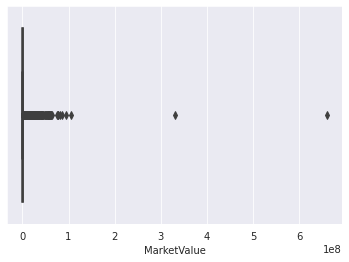

In [39]:
sns.boxplot(x = df_clean['MarketValue'])

### Identifying outliers and removing:
We removed all properties with a market value of $1.6 \times 10 ^6$m as they were outliers in our dataset. We also removed all properties with a size less than  or equal to 73 squared meters since they were too small compared to the sizes of the other properties in the study and they were also far from the average property size in South Africa, standing at 146 $m^2$

The box plot after removing outliers


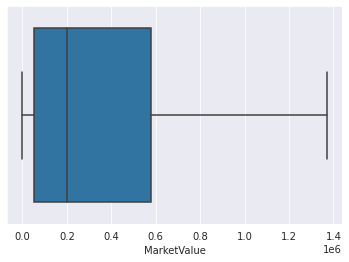

In [40]:
tmp = df_clean[df_clean.MarketValue <1.38e6]
print('The box plot after removing outliers')
sns.boxplot(x = tmp.MarketValue)
df_clean = tmp
df_clean = df_clean[df_clean['Size'] > 73]

### Summary statistics after removal of outliers:

In [41]:
df_clean.describe()

,Physical Addr,Size,MarketValue,Supp RollNo,Zone Code,Usage Code,Valuation Type,Ward,Cycle,Val Cnt
count,44818.000000,4.481800e+04,4.481800e+04,44818.000000,44818.000000,44818.000000,44818.000000,44818.000000,44818.000000,44818.000000
mean,748.888148,2.476271e+04,3.465684e+05,1.364630,10.210072,11.871168,1.822147,22.005600,20.264537,1.000982
std,347.143116,4.200803e+05,3.556825e+05,0.946044,3.728459,6.571180,0.382393,44.652744,16.367198,0.042238
min,1.000000,7.400000e+01,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,514.000000,3.510000e+02,5.200000e+04,1.000000,9.000000,9.000000,2.000000,15.000000,1.000000,1.000000
50%,698.000000,5.060000e+02,1.900000e+05,1.000000,9.000000,9.000000,2.000000,18.000000,20.000000,1.000000
75%,1062.000000,9.180000e+02,5.810000e+05,1.000000,9.000000,12.000000,2.000000,28.000000,30.000000,1.000000
max,1139.000000,4.982675e+07,1.370000e+06,6.000000,33.000000,55.000000,2.000000,999.000000,60.000000,4.000000


### Correlation Plots

Making our predictive variable the first variable. Thus the first column in the table makes it the focal point.

In [42]:
df_clean = df_clean[['MarketValue'] + [col for col in df_clean.columns if col != 'MarketValue']]
df_clean.head(2)

,MarketValue,Township,Owner Name,Prop Category,Physical Addr,Size,Supp RollNo,Effect Date,Zone Code,Usage Code,Valuation Type,Ward,Cycle,Meter Book,Val Cnt
8,1300000.0,NELSPRUIT TOWN,MINTY'S FURNITURE' CC,1,3,1487.0,1.0,2009-07-01,2,2,2,14.0,3.0,MB0008,1.0
9,390000.0,NELSPRUIT TOWN,JABULA TRUST,1,3,518.0,1.0,2009-07-01,2,2,2,14.0,3.0,MB0201,1.0


Encoding the rest of the categorical variables to see how they correlate with the other variables and most importantly the market value variable.

In [43]:
df_copy2 = df_clean.copy()

dic = pd.Series(df_copy2['Township'].unique())
dic.index = dic.index + 1
dic = pd.Series(dic.index.values, index = dic)

dic2 = pd.Series(df_copy2['Owner Name'].unique())
dic2.index = dic2.index + 1
dic2 = pd.Series(dic2.index.values, index = dic2)

dic3 = pd.Series(df_copy2['Meter Book'].unique())
dic3.index = dic3.index + 1
dic3 = pd.Series(dic3.index.values, index = dic3)

dic4 = pd.Series(df_copy2['Effect Date'].unique())
dic4.index = dic4.index + 1
dic4 = pd.Series(dic4.index.values, index = dic4)

lookup_table = dict(dic)

def lookup_customer(val):
    return lookup_table.get(val, np.nan)


df_copy2['Township'] = df_copy2['Township'].apply(lambda x: lookup_customer(x));

lookup_table = dict(dic2)
df_copy2['Owner Name'] = df_copy2['Owner Name'].apply(lambda x: lookup_customer(x));

lookup_table = dict(dic3)
df_copy2['Meter Book'] = df_copy2['Meter Book'].apply(lambda x: lookup_customer(x));

lookup_table = dict(dic4)
df_copy2['Effect Date'] = df_copy2['Effect Date'].apply(lambda x: lookup_customer(x));


df_copy2.head()

,MarketValue,Township,Owner Name,Prop Category,Physical Addr,Size,Supp RollNo,Effect Date,Zone Code,Usage Code,Valuation Type,Ward,Cycle,Meter Book,Val Cnt
8,1300000.0,1,1,1,3,1487.0,1.0,1,2,2,2,14.0,3.0,1,1.0
9,390000.0,1,2,1,3,518.0,1.0,1,2,2,2,14.0,3.0,2,1.0
12,400000.0,1,3,1,4,357.0,4.0,2,2,2,1,14.0,3.0,2,1.0
18,830000.0,1,4,1,1,496.0,1.0,1,1,1,2,14.0,3.0,3,1.0
27,980000.0,1,5,1,4,744.0,1.0,1,2,2,2,14.0,3.0,2,1.0


In [44]:
df_copy2 = df_copy2.astype('float64')
corr = df_copy2.corr()
corr

,MarketValue,Township,Owner Name,Prop Category,Physical Addr,Size,Supp RollNo,Effect Date,Zone Code,Usage Code,Valuation Type,Ward,Cycle,Meter Book,Val Cnt
MarketValue,1.000000,-0.236289,-0.038204,-0.097041,-0.475548,-0.014385,0.220281,0.180558,0.100358,-0.078660,-0.226426,-0.055619,-0.239560,-0.462026,-0.001720
Township,-0.236289,1.000000,0.636633,-0.139393,0.679673,-0.026383,-0.133049,-0.136060,-0.105634,0.069249,0.158095,0.029962,0.258242,0.664686,-0.014081
Owner Name,-0.038204,0.636633,1.000000,-0.116299,0.358619,-0.009758,-0.037078,-0.041907,-0.014365,-0.206690,0.047741,-0.039621,0.184250,0.364966,-0.014341
Prop Category,-0.097041,-0.139393,-0.116299,1.000000,-0.149659,0.196680,0.010235,-0.039495,0.648599,0.550533,0.028429,0.007853,0.235687,-0.108144,0.002195
Physical Addr,-0.475548,0.679673,0.358619,-0.149659,1.000000,-0.041362,-0.249115,-0.214608,-0.162744,0.068407,0.256619,0.065257,0.322087,0.841577,-0.017258
Size,-0.014385,-0.026383,-0.009758,0.196680,-0.041362,1.000000,0.000965,-0.008646,0.173614,0.125572,0.003549,-0.006628,0.056357,-0.029459,0.000345
Supp RollNo,0.220281,-0.133049,-0.037078,0.010235,-0.249115,0.000965,1.000000,0.652136,0.089472,0.003924,-0.828687,-0.022300,-0.134164,-0.255051,0.053023
Effect Date,0.180558,-0.136060,-0.041907,-0.039495,-0.214608,-0.008646,0.652136,1.000000,0.044367,-0.033817,-0.936832,-0.017427,-0.195460,-0.248871,0.039774
Zone Code,0.100358,-0.105634,-0.014365,0.648599,-0.162744,0.173614,0.089472,0.044367,1.000000,0.674279,-0.068337,-0.007402,0.147546,-0.176316,-0.013353
Usage Code,-0.078660,0.069249,-0.206690,0.550533,0.068407,0.125572,0.003924,-0.033817,0.674279,1.000000,0.027830,0.146784,0.105568,0.092284,-0.011201


#### Heat map

<AxesSubplot:>

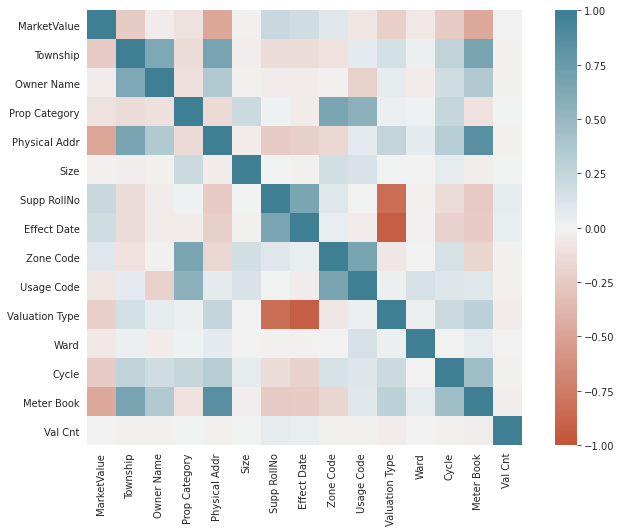

In [45]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, ax=ax)


#### Scatter plots

Jitter encoded varaibles for better data visualization

In [46]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

In [47]:
df_copy2['Physical Addr'] = Jitter(df_copy2['Physical Addr'])
df_copy2['Valuation Type'] = Jitter(df_copy2['Valuation Type'])
df_copy2['Usage Code'] = Jitter(df_copy2['Usage Code'])
df_copy2['Township'] = Jitter(df_copy2['Township'])
df_copy2['Owner Name'] = Jitter(df_copy2['Owner Name'])
df_copy2['Effect Date'] = Jitter(df_copy2['Effect Date'])
df_copy2['Meter Book'] = Jitter(df_copy2['Meter Book'])

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fb4cc4c5598> (for post_execute):


ValueError: Image size of 86400x86400 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 86400x86400 with 0 Axes>

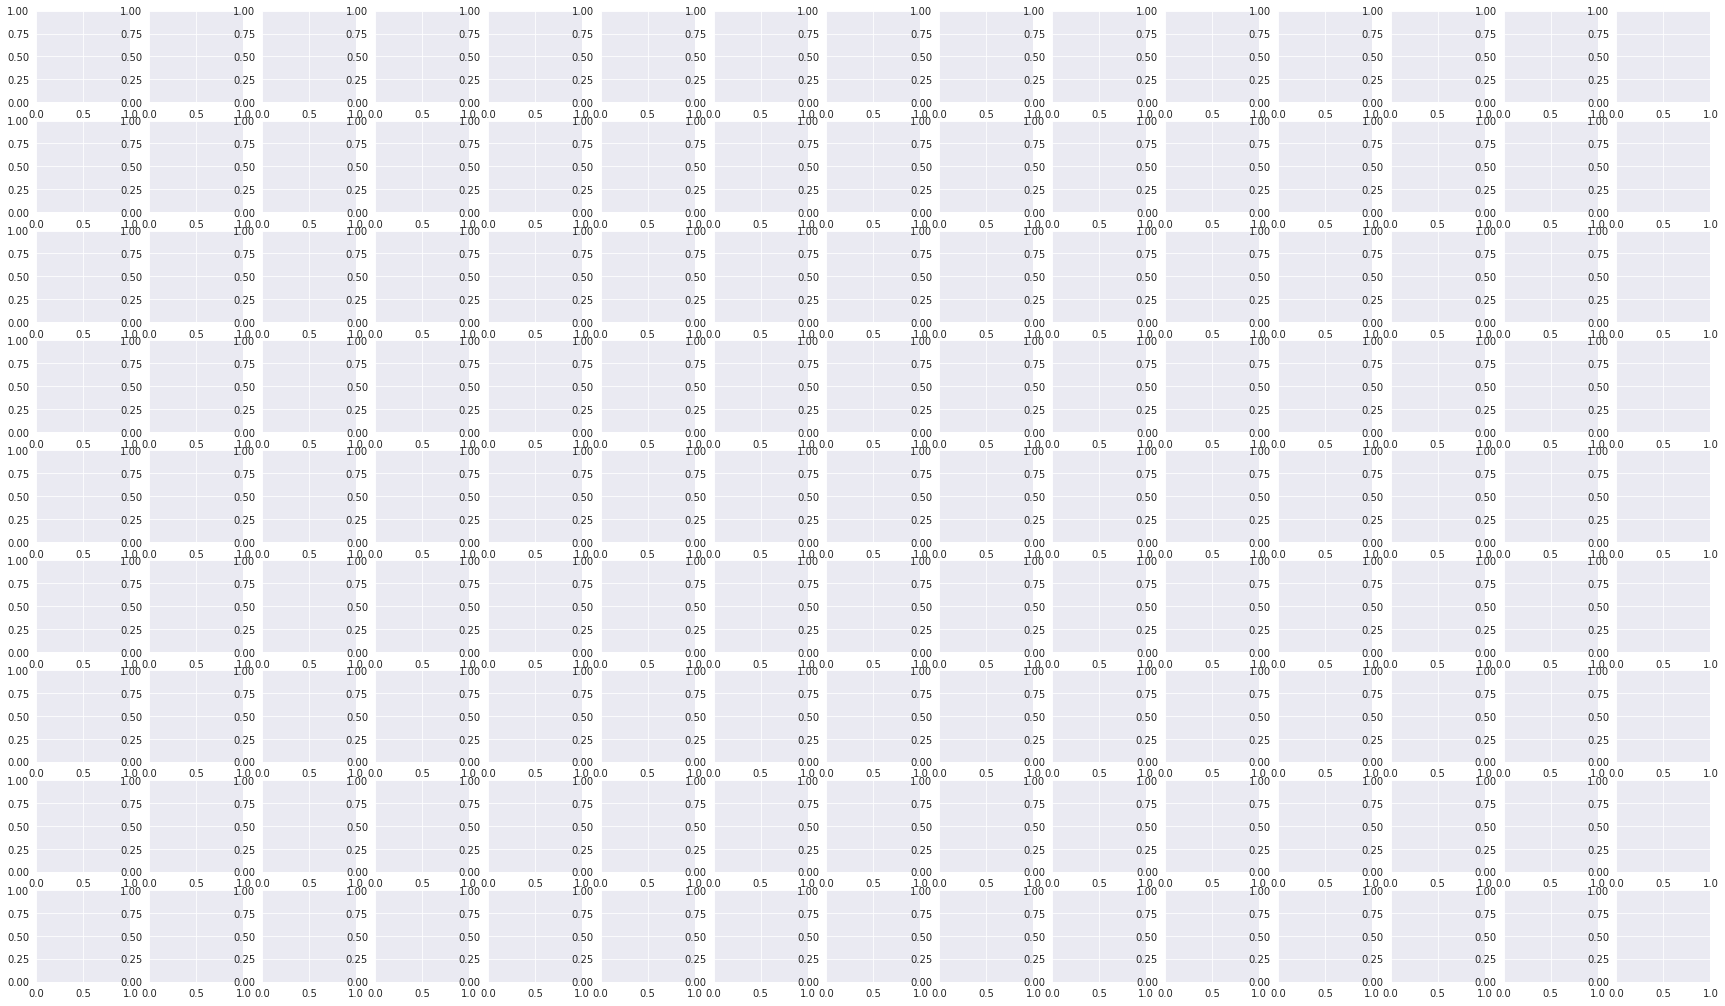

In [48]:
plt.figure(figsize=(1200, 1200))
mat_plot = sns.pairplot(df_copy2,diag_kind="hist",palette='Dark2',corner=True, height = 2)
plt.show()

From the correlation plots it is clear to see that our predictive variable(Market Value) has very little to non correlation with our deterministic variables. The variable that has the highest correlation with marketvalue is size.

# Data Splitting

In [50]:
#Split the data into Train, and Test
df = df_copy2.copy()
df.head()
X = df.loc[:, df.columns != 'MarketValue']
y = df.loc[:, 'MarketValue']

#Split the data into Train, and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
##Add constant(or bias) to the dataset
X_train = sm.add_constant(X_train)

In [51]:
print('Size of the training data is: ', len(y_train))
print('Size of the test data is:', len(y_test))

Size of the training data is:  30028
Size of the test data is: 14790


<blockqoute>In the next few sections we are going to try and fit a linear regression model that will capture the relationship between the marketValue and Township, Owner Name, Prop Category,Physical Addr, Size, Supp RollNo, Effect Date, Zone Code, Usage Code, Valuation Type, Ward, Cycle, Meter Book and Val Cnt.
We expect our linear regresion model to take this form : $$ Y= B_{1}x_{1} +B_{2}x_{2}+ ... $$ where $B_{i}\  $ for  i = {1,2,3, ...} are the weights associated with the respective regressors and Y is our target variable, the market value. 
</blockqoute>
### <b> Hypothesis one:
        
\begin{align}
\textit{Null Hypothesis : } H_{0}: B_{1} &= B_{2} = ... = B_{n} = 0\\
\textit{Alternate  Hypothesis : } H_{1}:  &  \ B_{i} \neq \ 0  for  \ at \ least \ one \ i.
\end{align}
    
The null  hypothesis above states that there is no factor that influences the market value. Whereas, alternative hypothesis states that at least one factor influences the market value.
<b>
### <b> Hypothesis two:
$ \mu_{1} \ represents \ the \ average \ market \ value \ of \ residential \ properties \ and  \ \mu_{2} 
and \ represents \ the  \ average \ market \\ value \ of \ business \ properties.$
    
\begin{align}
\textit{Null Hypothesis : } H_{0}: \mu_{1} &= \mu_{2} \\
\textit{Alternate  Hypothesis : } H_{1}:  \ &  \mu_{1} \neq \mu_{2}.
\end{align}
    
The null hypothesis above states that there is no difference between the average market value of business properties and the average value of residential properties.



# <b> Models

In this section, we fit our model using linear regression, and analyising the perfomance. The model fitting will be based on R-squared. Since we want to know how much our independent variables influence our dependet (Market Value), the R-squared measure is perfect for our modelling.

**Below is the initial model**

In [52]:
model = sm.OLS(y_train, X_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            MarketValue   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     993.0
Date:                Sat, 19 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:02:20   Log-Likelihood:            -4.2049e+05
No. Observations:               30028   AIC:                         8.410e+05
Df Residuals:                   30013   BIC:                         8.411e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           7.114e+05   4.24e+04     16.

From the above model, we have an R-squred value at  of $\approx 0.3$. The model also has multicollinearity between some of the variables, hence it produced high condition number.

### Optimizing the regression model

We use different methods to optimize our regression method, with the aim to improve out model's performance, by:
1. Using Variance Inflaction Factors(VIF) to remove features causing multicolinearity
2. Forward-Backward feature selection in order to add significant features 
3. Forward Selection to fit the optimal model.

## Feature Selection

***Stepforward and backward comment***

Below, we investigate the Variance inflation factor (VIF) to measure the amount multicolinearity in the features.

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]


In [54]:
X_train = calculate_vif_(X_train)

dropping 'const' at index: 0
dropping 'Val Cnt' at index: 13
dropping 'Meter Book' at index: 12
dropping 'Zone Code' at index: 7
dropping 'Physical Addr' at index: 3
dropping 'Township' at index: 0
dropping 'Usage Code' at index: 5
Remaining variables:
Index(['Owner Name', 'Prop Category', 'Size', 'Supp RollNo', 'Effect Date',
       'Valuation Type', 'Ward', 'Cycle'],
      dtype='object')


Our stepwise function is where most of the features are selected. We use p-value to determine if a variable shoud be added to our model. If the p-value is less than 5% we discard the feature.

Hypothesis testing on the features:

On each features we are testing that the feature has no impact on the MarketValue $H_{0}: B_{1}= B_{2} = ... = B_{n} = 0$ 

Our error term is 5%(0.05)

The t-stat we'll receive will be used to calculate the p-value. If the p-value is less than our error term which is 0.05 we will reject the null hypothesis and therefore will add the feature into our model since the null hypothesis that it does not have an influence on the Marketvalue is rejected. Any value with a p-value higher than 0.05 we will fail to reject the null hypothesis thus there is a chance that feature does not have an influence on MarketValue thus we discard it from our model. 

#### Forward stepwise selection

In [55]:
def stepwise_selection_forward(X, y, 
                       initial_list=[], 
                       threshold_in=0.05,
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Parameters:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, pd.DataFrame(X[included+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
        
        if not changed:
            break

        
    return included

Since the p-value of the features are influenced by other feature in the model, we have to do Backwards stepwise selection to discard those feature that have changed p-value such that the new p-value is greater than 0.05 and thus falls outside our rejection region of the null hypothesis.

#### Backwards stepwise selection

In [56]:
def stepwise_selection_backwards(X, y, 
                       initial_list=[],
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Parameters:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    """
    included=list(initial_list)

    while True:
        changed=False
        # backward step
        model = sm.OLS(y, X[included]).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
        
    return included


After the stepwise selection process we are left with 6 features namely Supp RollNo, Valuation Type, Cycle, Effect Date, Owner Name and Ward.

#### Puting data through the stepwise selection process

In [57]:
remaining_var = stepwise_selection_forward(X_train.loc[:, X_train.columns], y_train) #Need to exclude const because it is also added inside the fuctions
remaining_var = stepwise_selection_backwards(X_train.loc[:, X_train.columns], y_train, remaining_var)

Add  Owner Name                     with p-value 0.0
Add  Valuation Type                 with p-value 0.0
Add  Effect Date                    with p-value 0.0
Add  Supp RollNo                    with p-value 0.0
Add  Cycle                          with p-value 1.15497e-188
Add  Ward                           with p-value 2.12098e-07


#### Presenting the new model with the constant as part of our model

In [58]:
##The we make our new predictions.
#Append the bias term into the X data
X_train = sm.add_constant(X_train[remaining_var])
model = sm.OLS(y_train, X_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MarketValue   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     525.1
Date:                Sat, 19 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:02:41   Log-Likelihood:            -4.2471e+05
No. Observations:               30028   AIC:                         8.494e+05
Df Residuals:                   30021   BIC:                         8.495e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            3.62e+05   1.01e+04     35.850      0.000    3.42e+05    3.82e+05
Owner Name         0.3052      0.246      1.242      0.214      -0.177       0.787
Valuation Type -8482.6323   3726.856     -2.276      0.023   -1.58e+04   -1177.835
Effect Date     4940.0499   2185.636      2.260      0.024     656.109    9223.991
Supp RollNo     6.462e+04   2658.434     24.309      0.000    5.94e+04    6.98e+04
Cycle          -4559.3458    122.754    -37.142      0.000   -4799.948   -4318.744
Ward            -381.2159     42.460     -8.978      0.000    -464.440    -297.992
==============================================================================
Omnibus:                     3980.369   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5757.792
Skew:                           1.057   Prob(JB):                         0.00
Kurtosis:                       3.370   Cond. No.                     7.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Presenting the new model without the constant in our model

In [59]:
# Use VIF to remove the features and check perfomance
X_train = calculate_vif_(X_train)
model = sm.OLS(y_train, X_train)
result = model.fit()
result.summary()

dropping 'const' at index: 0
Remaining variables:
Index(['Owner Name', 'Valuation Type', 'Effect Date', 'Supp RollNo', 'Cycle',
       'Ward'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MarketValue   R-squared (uncentered):                   0.515
Model:                            OLS   Adj. R-squared (uncentered):              0.515
Method:                 Least Squares   F-statistic:                              5320.
Date:                Sat, 19 Jun 2021   Prob (F-statistic):                        0.00
Time:                        13:02:43   Log-Likelihood:                     -4.2534e+05
No. Observations:               30028   AIC:                                  8.507e+05
Df Residuals:                   30022   BIC:                                  8.507e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Owner Name         2.1116      0.246      8.595      0.000       1.630       2.593
Valuation Type  1.064e+05   1944.346     54.708      0.000    1.03e+05     1.1e+05
Effect Date     3.544e+04   2055.892     17.237      0.000    3.14e+04    3.95e+04
Supp RollNo     1.043e+05   2468.708     42.235      0.000    9.94e+04    1.09e+05
Cycle          -3596.9758    122.317    -29.407      0.000   -3836.723   -3357.229
Ward            -223.8092     43.126     -5.190      0.000    -308.339    -139.280
==============================================================================
Omnibus:                     3620.791   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5069.402
Skew:                           0.989   Prob(JB):                         0.00
Kurtosis:                       3.375   Cond. No.                     1.94e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Removal of the constant, based on the VIF, in the data yield better results. This makes sense because the MarketValue of property should be zero if there are no features present. We also notice that the model R-squared significantly improve from 9.5% to 51.7%. This new R-squared is even higher than the initial model(31.7%) thus leading us to selecting this model as our optimal model.

## <b>Residual Plots

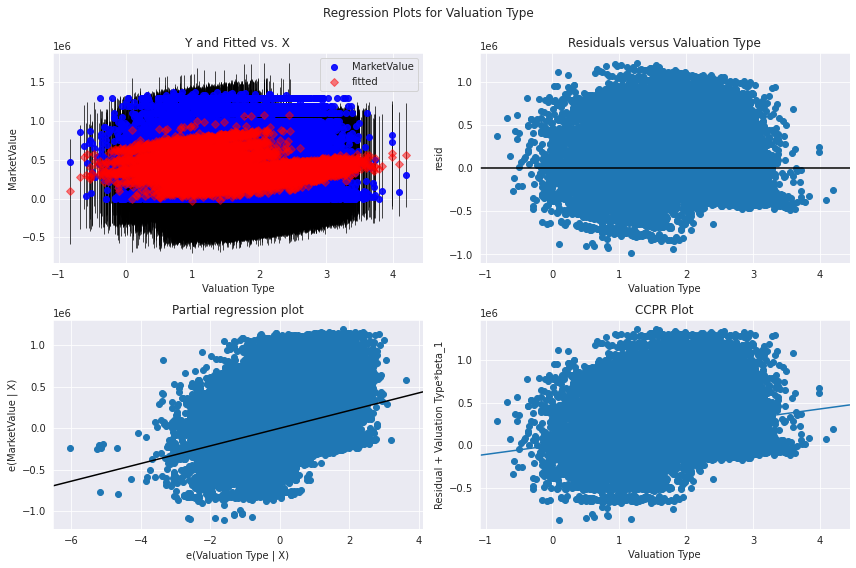

In [60]:
# MarketValue vs Valuation_type residual plots
fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(result, 'Valuation Type', fig=fig)

The partial regressing plot shows a random pattern. This tells us the residual supports a linear regression and was fitted well with out data.

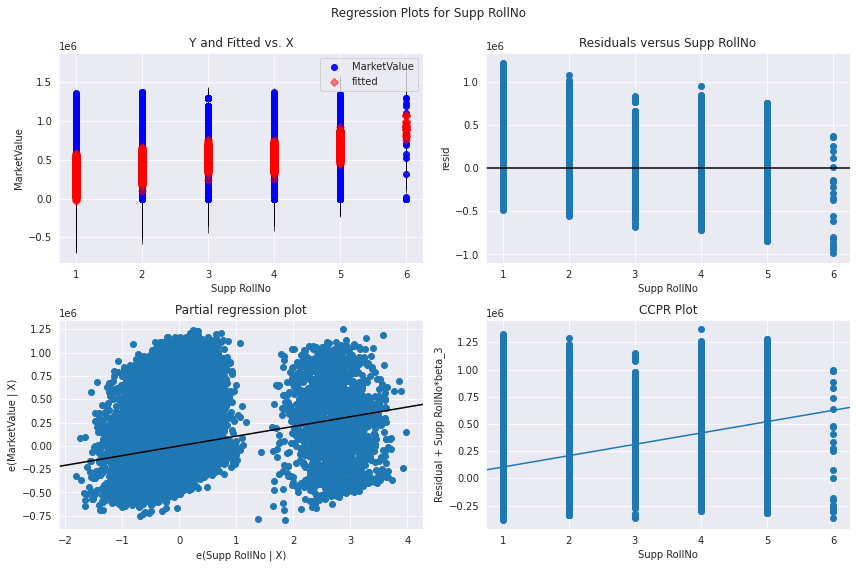

In [61]:
#Supp RollNo vs MarketValue

fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(result, 'Supp RollNo', fig=fig)

In the partial plot, we see the random pattern indicating a decent fit to the data

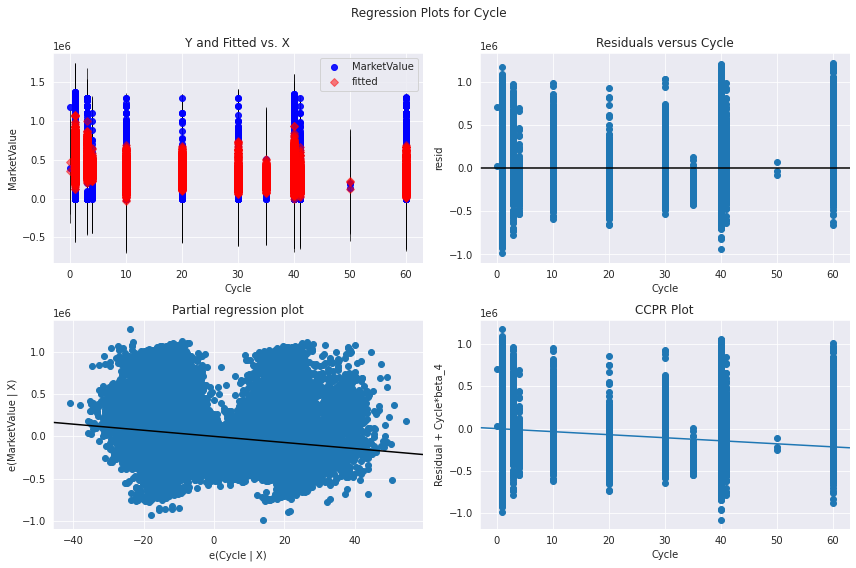

In [62]:
# Cycle vs MarketValue
fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(result, 'Cycle', fig=fig)

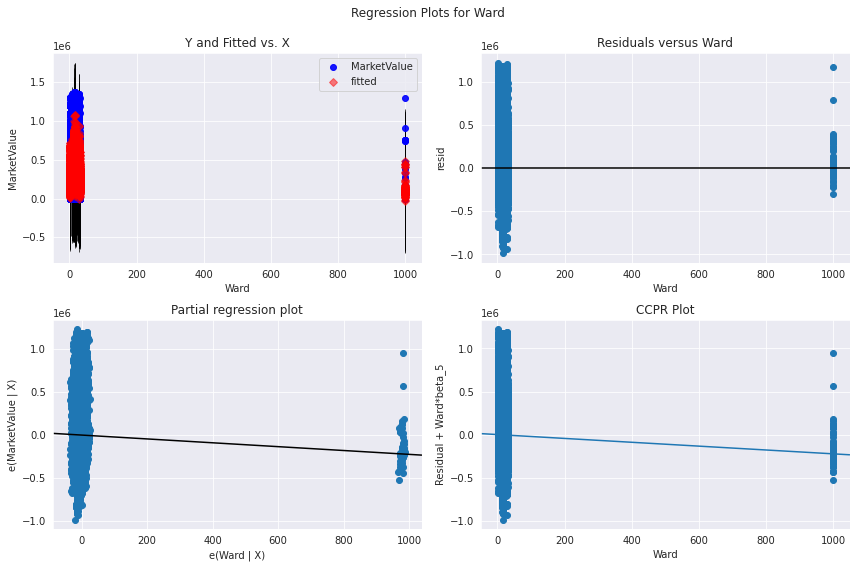

In [63]:
#Ward vs MarketValue
fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(result, 'Ward', fig=fig)

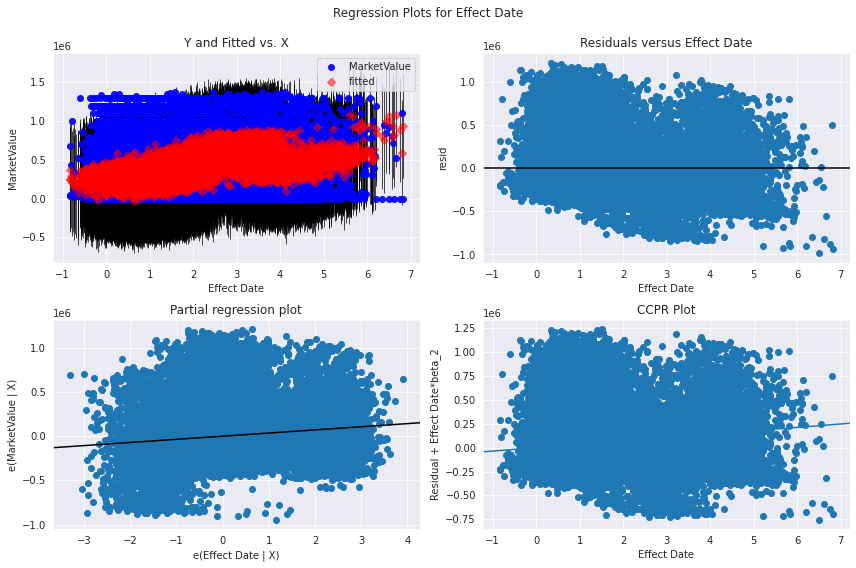

In [64]:
#Effect Date vs MarketValue
fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(result, 'Effect Date', fig=fig)

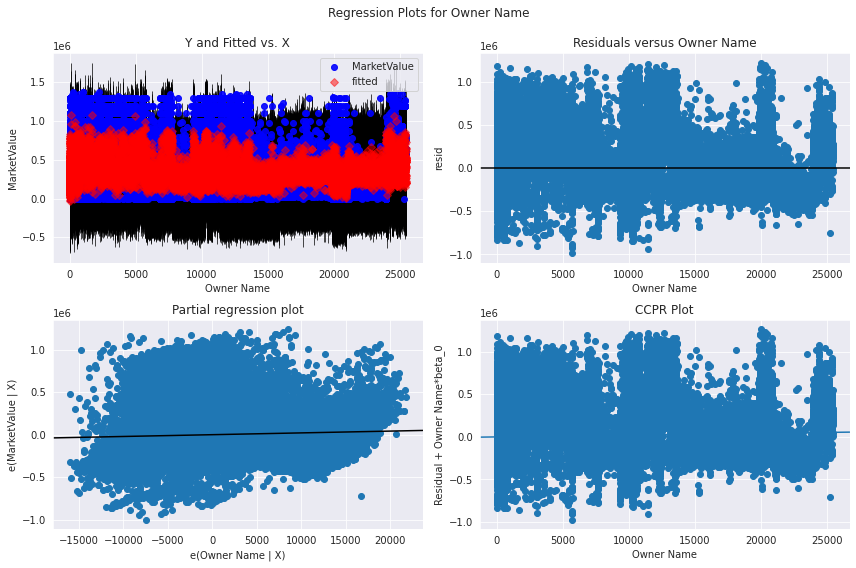

In [65]:
#Owner Name vs MarketValue
fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(result, 'Owner Name', fig=fig)

The plot is not randomly plotted. This means linar regresion was not a good fit for the data.

## <b> Model Using test data

In [66]:
model = sm.OLS(y_test, X_test)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MarketValue   R-squared (uncentered):                   0.648
Model:                            OLS   Adj. R-squared (uncentered):              0.648
Method:                 Least Squares   F-statistic:                              1943.
Date:                Sat, 19 Jun 2021   Prob (F-statistic):                        0.00
Time:                        13:03:13   Log-Likelihood:                     -2.0747e+05
No. Observations:               14790   AIC:                                  4.150e+05
Df Residuals:                   14776   BIC:                                  4.151e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Township         179.0732     28.773      6.224      0.000     122.674     235.473
Owner Name         4.6985      0.463     10.154      0.000       3.792       5.606
Prop Category  -6.828e+04   2396.943    -28.485      0.000    -7.3e+04   -6.36e+04
Physical Addr   -412.1858     13.979    -29.486      0.000    -439.586    -384.785
Size              -0.0119      0.005     -2.466      0.014      -0.021      -0.002
Supp RollNo      3.33e+04   3395.127      9.808      0.000    2.66e+04       4e+04
Effect Date     -640.7872   2786.155     -0.230      0.818   -6101.998    4820.424
Zone Code       1.903e+04   1160.811     16.393      0.000    1.68e+04    2.13e+04
Usage Code      1261.4520    639.548      1.972      0.049       7.858    2515.046
Valuation Type  1.326e+04   4664.931      2.842      0.004    4116.090    2.24e+04
Ward            -154.9901     59.389     -2.610      0.009    -271.399     -38.581
Cycle           -469.9546    183.768     -2.557      0.011    -830.164    -109.745
Meter Book     -1057.1213     89.538    -11.806      0.000   -1232.628    -881.615
Val Cnt         6.108e+05   1.55e+04     39.518      0.000    5.81e+05    6.41e+05
==============================================================================
Omnibus:                     1809.009   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2923.710
Skew:                           0.858   Prob(JB):                         0.00
Kurtosis:                       4.341   Cond. No.                     3.36e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Using the test data, the model performed well with the R-square value of $0.648$

In [67]:
#Fitting on testing but using chosen variables from training data
model = sm.OLS(y_test, X_test[remaining_var])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MarketValue   R-squared (uncentered):                   0.519
Model:                            OLS   Adj. R-squared (uncentered):              0.519
Method:                 Least Squares   F-statistic:                              2661.
Date:                Sat, 19 Jun 2021   Prob (F-statistic):                        0.00
Time:                        13:03:13   Log-Likelihood:                     -2.0977e+05
No. Observations:               14790   AIC:                                  4.196e+05
Df Residuals:                   14784   BIC:                                  4.196e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Owner Name         2.0199      0.357      5.663      0.000       1.321       2.719
Valuation Type  1.105e+05   2806.707     39.382      0.000    1.05e+05    1.16e+05
Effect Date     3.506e+04   3012.096     11.641      0.000    2.92e+04     4.1e+04
Supp RollNo     1.088e+05   3537.572     30.755      0.000    1.02e+05    1.16e+05
Cycle          -3754.8336    176.097    -21.323      0.000   -4100.006   -3409.661
Ward            -307.2284     67.490     -4.552      0.000    -439.517    -174.940
==============================================================================
Omnibus:                     1701.089   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2347.948
Skew:                           0.964   Prob(JB):                         0.00
Kurtosis:                       3.305   Cond. No.                     1.91e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model retains the same R-squared value on test data, thus this shows us that the trained model is not overfitting on the trained dataset.

## <b> Model with Bootstrapped Coefficients:

In [76]:
## features selected by vif 
X_train_vif = X_train
y_train_vif = y_train
bootstrap_data = X_train_vif
bootstrap_data['y'] = list(y_train_vif.values)
bootstrap_data

,Owner Name,Valuation Type,Effect Date,Supp RollNo,Cycle,Ward,y
6673,3153.565785,1.824463,0.917027,1.0,1.0,15.0,680000.0
12858,7659.472342,0.937908,4.229175,2.0,1.0,17.0,283000.0
43015,20850.710620,1.782559,0.633975,1.0,60.0,1.0,630000.0
32813,14762.757823,2.760664,1.067163,1.0,41.0,33.0,130000.0
17331,12.904773,1.854809,0.548007,1.0,30.0,18.0,25000.0
...,...,...,...,...,...,...,...
13962,6191.626820,1.472568,1.710243,1.0,30.0,18.0,42000.0
57129,25384.533599,1.065952,3.892749,2.0,3.0,14.0,589000.0
48539,600.517671,2.928477,0.283073,1.0,20.0,28.0,58000.0
1725,731.761643,2.338040,0.780160,1.0,1.0,17.0,1100000.0


In [77]:
def r_square_value(y_true, y_predicted):
    return mean_squared_error(y_true, y_predicted)

In [78]:
bootstrap_data = bootstrap_data.rename(columns={'Owner Name': 'Owner_Name', 'Effect Date': 'Effect_Date','Valuation Type':'Valuation_Type', 'Supp RollNo':'Supp_RollNo'}, index={'ONE': 'Row_1'})

In [88]:
owner_name_coeff = []
val_type_coeff = []
eff_dt_coeff = []
supp_rollno_coeff = []
cycle_coeff = []
ward_coeff = []

iterations = 10000

for _ in range(iterations):
    # sampling data points with replacement
    sample_data = bootstrap_data.sample(n=300, replace=True)
    # fit model without constant
    model = form.ols(formula = 'y ~ Owner_Name+Valuation_Type +Effect_Date+ Supp_RollNo+Cycle +Ward - 1 ', data=sample_data)
    results = model.fit()
    # append coefficients
    owner_name_coeff.append(results.params[0])
    val_type_coeff.append(results.params[1])
    eff_dt_coeff.append(results.params[2])
    supp_rollno_coeff.append(results.params[3])
    cycle_coeff.append(results.params[4])
    ward_coeff.append(results.params[5])


In [89]:
# getting the coefficients of the selected features using the average of their bootstratted values
owner_name_coeff = np.mean(np.array(owner_name_coeff))
val_type_coeff = np.mean(np.array(val_type_coeff))
eff_dt_coeff = np.mean(np.array(eff_dt_coeff ))
supp_rollno_coeff = np.mean(np.array(supp_rollno_coeff))
cycle_coeff  = np.mean(np.array(cycle_coeff))
ward_coeff = np.mean(np.array(ward_coeff))
print("owner_name_coeff is ", owner_name_coeff )
print("val_type_coeff ", val_type_coeff)
print("effect_date_coeff is ",eff_dt_coeff)
print("supp_rollno_coeff  is", supp_rollno_coeff )
print("ward_coeff is ", ward_coeff)
print("cycle_coeff is ", cycle_coeff)

owner_name_coeff is  2.14823576218544
val_type_coeff  115596.94843284386
effect_date_coeff is  37243.812191084326
supp_rollno_coeff  is 107497.69120649975
ward_coeff is  -1561.0331740812267
cycle_coeff is  -3514.4932876644107


In [111]:
def predict_y_value(coefficients, features):
    return np.dot(coefficients.T, features)

In [122]:
coefficients_list =np.array([owner_name_coeff,val_type_coeff ,eff_dt_coeff ,supp_rollno_coeff ,cycle_coeff ,ward_coeff] )[..., None].astype(float)
y_predicted_list_train  = []
for i in range(0, len(X_train_vif)):
    x_values = np.array(list(X_train_vif.iloc[i, 0:6]))[..., None]
    y_predicted = predict_y_value(coefficients_list, x_values)[0][0]
    y_predicted_list_train.append(y_predicted)

In [125]:
y_true_list_train = list(bootstrap_data['y'])
MSE_train = r_square_value(y_true_list_train, y_predicted_list_train)
print("MSE for train set :" ,MSE_train)

MSE for train set : 121504532543.67445


In [127]:
X_test = X_test[remaining_var]
X_test

,Owner Name,Valuation Type,Effect Date,Supp RollNo,Cycle,Ward
33203,15021.694024,2.468852,1.219098,1.0,41.0,21.0
1704,716.994063,0.753796,4.769270,3.0,1.0,17.0
25878,5413.253736,1.616264,0.990129,1.0,40.0,15.0
22432,9573.686461,1.710943,1.960091,1.0,40.0,17.0
34352,15536.960898,2.253943,0.949361,1.0,41.0,32.0
...,...,...,...,...,...,...
37889,17398.708297,2.629301,2.074665,1.0,10.0,20.0
3929,2007.260586,0.733291,1.675950,4.0,1.0,16.0
39348,18405.064269,1.802680,1.606808,1.0,10.0,20.0
40050,6153.079730,2.044892,0.169732,1.0,10.0,19.0


In [129]:
y_predicted_list_test = []
for i in range(0, len(X_test)):
    x_values = np.array(list(X_test.iloc[i, 0:6]))[..., None]
    y_predicted = predict_y_value(coefficients_list, x_values)[0][0]
    y_predicted_list_test.append(y_predicted)

In [131]:
#MSE_test = r_square_value(y_train, y_predicted_list_test)
#print("MSE for test set :" ,MSE_test)

# Conclusion

Based on our final model MarketValue =  1.121e+05(Supp RollNo) + 1.088e+05(Valuation Type) - 3720.9505(Cycle) +  3.18e+04(Effect Date) +  2.1290(Owner Name) - 293.6793(Ward), this clearly shows that not all weights are zero, thus leading to us rejecting our null hypothesis that where $B_{i}\  $ = 0 for all i.Based on our results, Supp Rollno, Valuation Type , Cycle, Effect Date, Owner Name and ward are the only determinants of the Market Value. According to the test results of our linear regression model the effect date has a greatest positive influence on the Market Value, this is shown by the large coefficient value for this variable. Cycle has the greatest negative influence on the negative influence on the Market Value.